In [ ]:
#imports
from sklearn.impute import KNNImputer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn
from sklearn.model_selection import cross_val_score,cross_validate, validation_curve, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
#import data
train1 = pd.read_csv('data/training1.csv')
train2 = pd.read_csv('data/training2.csv')
test_data = pd.read_csv('data/test.csv')
sample_valid_predictions = pd.read_csv('data/sample_valid_predictions.csv')
train1 = train1.values
train2 = train2.values
test_data = test_data.values
sample_valid_predictions = sample_valid_predictions.values

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#confirm set sizes
print('train1: ',train1.shape)
print('train2: ',train2.shape)
print('test: ',test_data.shape)

train1:  (600, 4610)
train2:  (2800, 4610)
test:  (2000, 4608)


In [ ]:
#check cnn and gist indivdually
svc = SVC(C=1,kernel='rbf')
print('acc gist svc ', np.mean(cross_val_score(svc,train1[:,4096:-2],train1[:,-2],fit_params={'sample_weight':train1[:,-1]},scoring='accuracy')))
print('f1 gist svc ', np.mean(cross_val_score(svc,train1[:,4096:-2],train1[:,-2],fit_params={'sample_weight':train1[:,-1]},scoring='f1')))
print('acc cnn svc ', np.mean(cross_val_score(svc,train1[:,:512],train1[:,-2],fit_params={'sample_weight':train1[:,-1]},scoring='accuracy')))
print('f1 cnn svc ', np.mean(cross_val_score(svc,train1[:,:512],train1[:,-2],fit_params={'sample_weight':train1[:,-1]},scoring='f1')))
print('acc cnn_all svc ', np.mean(cross_val_score(svc,train1[:,:4096],train1[:,-2],fit_params={'sample_weight':train1[:,-1]},scoring='accuracy')))
print('f1 cnn_all svc ', np.mean(cross_val_score(svc,train1[:,:4096],train1[:,-2],fit_params={'sample_weight':train1[:,-1]},scoring='f1')))
print('acc all svc ', np.mean(cross_val_score(svc,train1[:,:-2],train1[:,-2],fit_params={'sample_weight':train1[:,-1]},scoring='accuracy')))
print('f1 all svc ', np.mean(cross_val_score(svc,train1[:,:-2],train1[:,-2],fit_params={'sample_weight':train1[:,-1]},scoring='f1')))

acc gist svc  0.7216666666666667
f1 gist svc  0.6992467657835947
acc cnn svc  0.7583333333333333
f1 cnn svc  0.7244134413441344
acc cnn_all svc  0.7533333333333333
f1 cnn_all svc  0.7194409029758508
acc all svc  0.7533333333333333
f1 all svc  0.7194409029758508


Text(0.5, 1.0, 'class: 1.0')

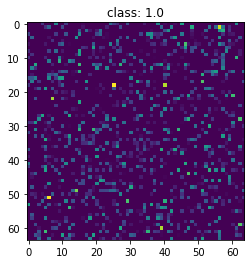

In [ ]:
#check cnn features in terms of conv layer outputs
ind = np.random.randint(0,600)
plt.imshow(np.reshape(train1[ind,:4096],(64,64)))
plt.title('class: {}'.format(train1[ind,-2]))

In [ ]:
#missing values analysis
test_nan_matrix = (np.isnan(test_data[:,:-2]))
test_nan_matrix.sum()

1843597

In [ ]:
nan_matrix = (np.isnan(train2[:,:-2]))

In [ ]:
feat_nan = np.sum(nan_matrix, axis=0)/nan_matrix.shape[0]   # sums of nans in featurs divided by no of samples
sample_nan = np.sum(nan_matrix, axis=1)/nan_matrix.shape[1] # sums of nans in samples divided by no of feats
print(feat_nan.shape)
print(sample_nan.shape)

(4608,)
(2800,)


{'boxes': [<matplotlib.lines.Line2D at 0x7f8af97cbb50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8af97cfbd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8af97d9410>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8af97d9950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8af97cf150>,
  <matplotlib.lines.Line2D at 0x7f8af97cf690>]}

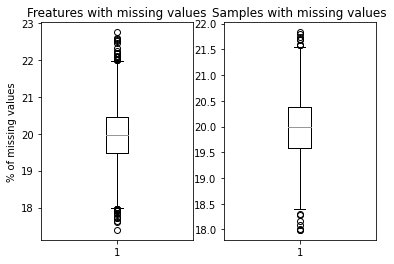

In [ ]:
ax = plt.subplot(121)
plt.rcParams["figure.figsize"] = (6,3)
#plt.tight_layout()
plt.boxplot(feat_nan*100)
plt.ylabel("% of missing values")
ax.title.set_text('Freatures with missing values')
ax = plt.subplot(122)
ax.title.set_text('Samples with missing values')
plt.boxplot(sample_nan*100)

In [ ]:
#concatenate the training data for preprocessing and separete labels and cofnidence score
#shuffle the samples
all_labels = np.concatenate([train1[:,-2:],train2[:,-2:]])
all_train = np.concatenate([train1[:,:-2],train2[:,:-2]])
np.random.seed(215748)
random_inds = np.random.permutation(all_train.shape[0])
all_train = all_train[random_inds,:]
all_labels = all_labels[random_inds,:]

In [ ]:
#check ratio of confidence and labels
print('{:.2f}% of examples are "memorable"'.format((all_labels[:,0] == 1).sum()/all_labels.shape[0]*100))
print('{:.2f}% of examples were strongly voted'.format((all_labels[:,1] == 1).sum()/all_labels.shape[0]*100))
print('{:.2f}% of examples were weakly voted'.format((all_labels[:,1] == .66).sum()/all_labels.shape[0]*100))
print('{:.2f}% of memorable were strongly voted'.format(((all_labels[:,1] == 1)*(all_labels[:,0] == 1)).sum()/all_labels.shape[0]*100))
print('{:.2f}% of non-memorable were strongly voted'.format(((all_labels[:,1] == 1)*(all_labels[:,0] == 0)).sum()/all_labels.shape[0]*100))
print('{:.2f}% of memorable were weakly voted'.format(((all_labels[:,1] == .66)*(all_labels[:,0] == 1)).sum()/all_labels.shape[0]*100))
print('{:.2f}% of non-memorable were weakly voted'.format(((all_labels[:,1] == .66)*(all_labels[:,0] == 0)).sum()/all_labels.shape[0]*100))

46.26% of examples are "memorable"
26.44% of examples were strongly voted
73.56% of examples were weakly voted
12.62% of memorable were strongly voted
13.82% of non-memorable were strongly voted
33.65% of memorable were weakly voted
39.91% of non-memorable were weakly voted


In [ ]:
scaler = StandardScaler()
train1_stand = scaler.fit_transform(train1[:,:-2])

In [ ]:
#standarise and impute
scaler = StandardScaler()
scaler.fit(all_train)
all_train = scaler.transform(all_train)
test_data = scaler.transform(test_data)
imputer = KNNImputer(n_neighbors=5)
imputer.fit(all_train)
all_train = imputer.fit_transform(all_train)
test_data = imputer.fit_transform(test_data)

In [ ]:
#with/witout imputation
feats_inds = np.random.permutation(4608)
feats_size = np.arange(5,106,10)
scores_i=[]
scores=[]
for i, s in enumerate(feats_size):
  svc = SVC(C=1,kernel='rbf')
  scores.append(cross_validate(svc,all_train[:,feats_inds[:s]],all_labels[:,0],cv=5,fit_params={'sample_weight':all_labels[:,1]},scoring={'acc':'accuracy','f1':'f1'},return_train_score=True))
  scores_i.append(cross_validate(svc,train1_stand[:,feats_inds[:s]],train1[:,-2],cv=5,fit_params={'sample_weight':train1[:,-1]},scoring={'acc':'accuracy','f1':'f1'},return_train_score=True))


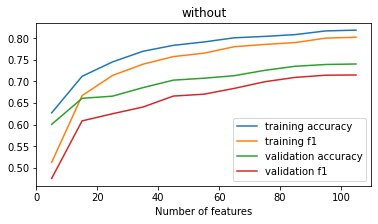

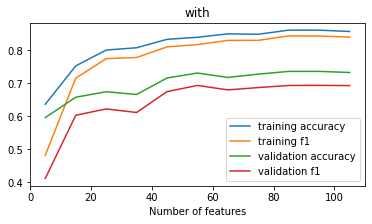

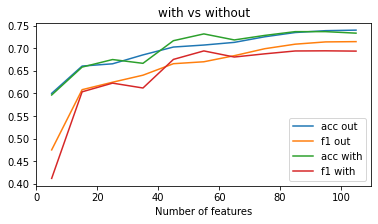

In [ ]:
f1_vals = np.array([np.mean(d['test_f1']) for d in scores])
acc_vals = np.array([np.mean(d['test_acc']) for d in scores])
f1_trains = np.array([np.mean(d['train_f1']) for d in scores])
acc_trains = np.array([np.mean(d['train_acc']) for d in scores])
plt.plot(feats_size,list(zip(acc_trains,f1_trains,acc_vals,f1_vals)))
plt.legend(['training accuracy','training f1','validation accuracy','validation f1'],loc='best')#, bbox_to_anchor=(0.52, .4, 0.5, 0.5))
plt.xlabel('Number of features')
plt.title('without')
plt.show()
f1_vals = np.array([np.mean(d['test_f1']) for d in scores_i])
acc_vals = np.array([np.mean(d['test_acc']) for d in scores_i])
f1_trains = np.array([np.mean(d['train_f1']) for d in scores_i])
acc_trains = np.array([np.mean(d['train_acc']) for d in scores_i])
plt.plot(feats_size,list(zip(acc_trains,f1_trains,acc_vals,f1_vals)))
plt.legend(['training accuracy','training f1','validation accuracy','validation f1'],loc='best')#, bbox_to_anchor=(0.52, .4, 0.5, 0.5))
plt.xlabel('Number of features')
plt.title('with')
plt.show()
f1_out = np.array([np.mean(d['test_f1']) for d in scores])
acc_out = np.array([np.mean(d['test_acc']) for d in scores])
f1_with = np.array([np.mean(d['test_f1']) for d in scores_i])
acc_with = np.array([np.mean(d['test_acc']) for d in scores_i])
plt.plot(feats_size,list(zip(acc_out,f1_out,acc_with,f1_with)))
plt.legend(['acc out','f1 out','acc with','f1 with'],loc='best')#, bbox_to_anchor=(0.52, .4, 0.5, 0.5))
plt.xlabel('Number of features')
plt.title('with vs without')
plt.show()

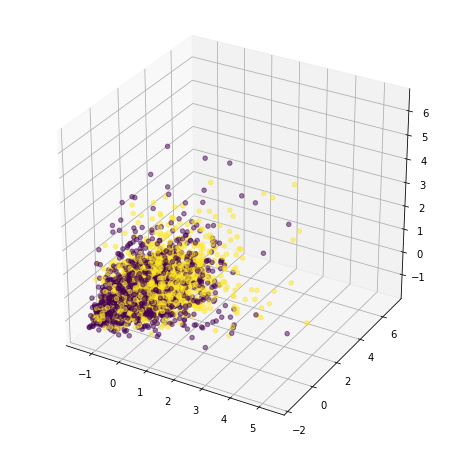

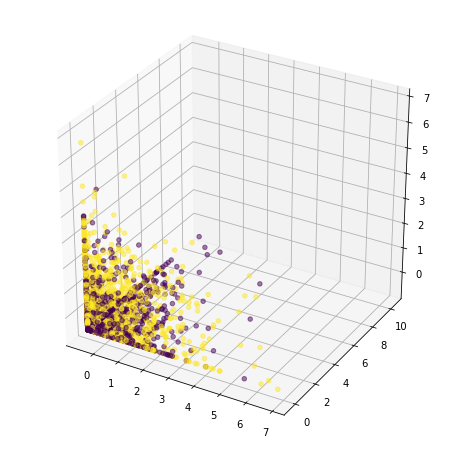

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(all_train[:,4096],all_train[:,4097],all_train[:,4098],alpha=.5,c=all_labels[:,0])
plt.show()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(all_train[:,1000],all_train[:,2000],all_train[:,3000],alpha=.5,c=all_labels[:,0])
plt.show()

In [ ]:
#dimensionality reduction
pca = sklearn.decomposition.PCA()
pca.fit(all_train)
transformed_train = pca.transform(all_train)
test_data = pca.transform(test_data)

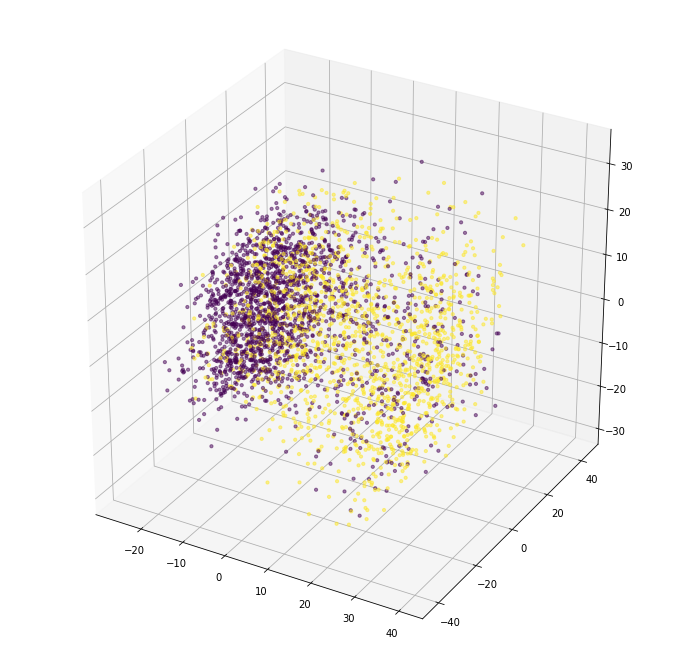

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
ax.scatter(transformed_train[:,0],transformed_train[:,1],transformed_train[:,2],s=10,alpha=.5,c=all_labels[:,0])

No handles with labels found to put in legend.


Text(0.5, 0, 'Principal components')

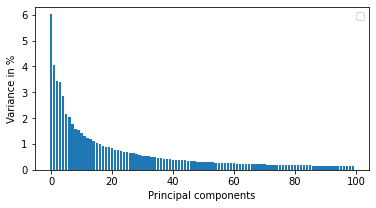

In [ ]:
#PC analysis
vals = pca.explained_variance_ratio_
plt.bar(range(100), vals[:100]*100)
plt.legend()
plt.ylabel('Variance in %')
plt.xlabel('Principal components')

In [ ]:
print('first two PCs{:.2f}'.format((vals[0]+vals[1])*100))

0.1008805056662268


In [ ]:
print((np.cumsum(vals)*100)[np.cumsum(vals)<=.75].shape[0])

218


Text(0.5, 0, 'Number of components')

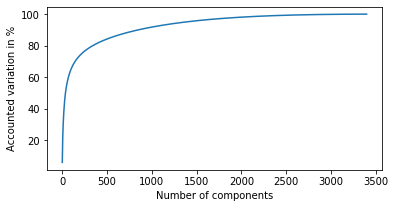

In [ ]:
plt.plot((np.cumsum(vals)*100))
plt.ylabel('Accounted variation in %')
plt.xlabel('Number of components')

In [ ]:
svc = SVC(C=1,kernel='rbf')
lol = cross_validate(svc,transformed_train,all_labels[:,0],cv=5,fit_params={'sample_weight':all_labels[:,1]},scoring={'acc':'accuracy','f1':'f1'})

In [ ]:
lol

{'fit_time': array([12.40694356, 15.16451645, 12.33521628, 12.32800221, 12.40084171]),
 'score_time': array([4.64837575, 6.73114491, 4.5791049 , 4.55963492, 4.59017801]),
 'test_acc': array([0.73970588, 0.76764706, 0.77058824, 0.75588235, 0.74852941]),
 'test_f1': array([0.71949287, 0.74598071, 0.76291793, 0.74303406, 0.73732719])}

In [ ]:
steps = np.arange(15,105,5)
scores=[]
components = np.zeros(steps.shape[0], dtype = np.int32)
for i, step in enumerate(steps):
  svc = SVC(C=1,kernel='rbf')
  components[i] = (np.cumsum(vals)*100)[np.cumsum(vals)<=step/100].shape[0]
  scores.append(cross_validate(svc,transformed_train[:,:components[i]],all_labels[:,0],cv=5,fit_params={'sample_weight':all_labels[:,1]},scoring={'acc':'accuracy','f1':'f1'},return_train_score=True))

Text(0.5, 0, 'Number of principal components')

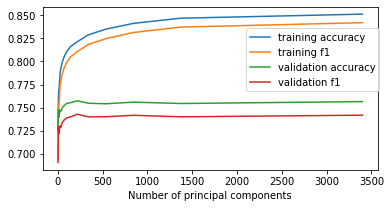

In [ ]:
f1_vals = np.array([np.mean(d['test_f1']) for d in scores])
acc_vals = np.array([np.mean(d['test_acc']) for d in scores])
f1_trains = np.array([np.mean(d['train_f1']) for d in scores])
acc_trains = np.array([np.mean(d['train_acc']) for d in scores])
plt.plot(components,list(zip(acc_trains,f1_trains,acc_vals,f1_vals)))
plt.legend(['training accuracy','training f1','validation accuracy','validation f1'],loc='best', bbox_to_anchor=(0.52, .4, 0.5, 0.5))
plt.xlabel('Number of principal components')

In [ ]:
chosen_all = transformed_train[:,:200]
test_data = test_data[:,:200]
scores = cross_validate(svc,chosen_all,all_labels[:,0],cv=5,fit_params={'sample_weight':all_labels[:,1]},scoring={'acc':'accuracy','f1':'f1'},return_train_score=True)

In [ ]:
print('train acc: ',np.mean(scores['train_acc']))
print('train f1:  ',np.mean(scores['train_f1']))
print('test acc: ',np.mean(scores['test_acc']))
print('test f1:  ',np.mean(scores['test_f1']))

train acc:  0.820735294117647
train f1:   0.8098042579895699
test acc:  0.7558823529411764
test f1:   0.7408305510672962


In [ ]:
##hyper-params
#with/without confidence
samples_size = np.arange(50,1051,100)
scores_c=[]
scores=[]
for i, s in enumerate(samples_size):
  svc = SVC(C=1,kernel='rbf')
  scores.append(cross_validate(svc,chosen_all[:s],all_labels[:s,0],cv=5,scoring={'acc':'accuracy','f1':'f1'},return_train_score=True))
  scores_c.append(cross_validate(svc,chosen_all[:s],all_labels[:s,0],cv=5,fit_params={'sample_weight':all_labels[:s,1]},scoring={'acc':'accuracy','f1':'f1'},return_train_score=True))

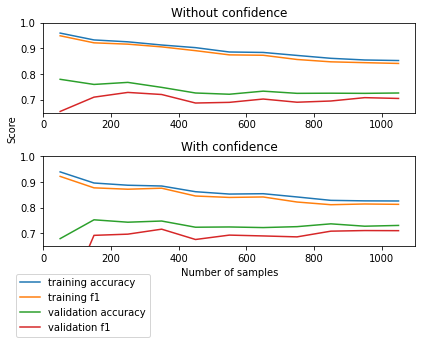

In [ ]:
fig, axs = plt.subplots(2,1,figsize=(6,5))
f1_vals = np.array([np.mean(d['test_f1']) for d in scores])
acc_vals = np.array([np.mean(d['test_acc']) for d in scores])
f1_trains = np.array([np.mean(d['train_f1']) for d in scores])
acc_trains = np.array([np.mean(d['train_acc']) for d in scores])
axs[0].plot(samples_size,list(zip(acc_trains,f1_trains,acc_vals,f1_vals)))
axs[0].title.set_text('Without confidence')
axs[0].set_ylim(.65,1.0)
f1_vals = np.array([np.mean(d['test_f1']) for d in scores_c])
acc_vals = np.array([np.mean(d['test_acc']) for d in scores_c])
f1_trains = np.array([np.mean(d['train_f1']) for d in scores_c])
acc_trains = np.array([np.mean(d['train_acc']) for d in scores_c])
axs[1].plot(samples_size,list(zip(acc_trains,f1_trains,acc_vals,f1_vals)))
axs[1].legend(['training accuracy','training f1','validation accuracy','validation f1'],loc='best', bbox_to_anchor=(0., .3, 0.3, -.55))
axs[1].set_xlabel('Number of samples')
axs[1].set_ylim(.65,1.0)
axs[1].title.set_text('With confidence')
fig.text(0.03, .63, 'Score', va='center', rotation='vertical')
plt.tight_layout()
plt.show()

In [ ]:
#C param
reg_params = np.arange(.2,1.0,.05)
scores=[]
for i, c in enumerate(reg_params):
  svc = SVC(C=c,kernel='rbf')
  scores.append(cross_validate(svc,chosen_all,all_labels[:,0],cv=5,fit_params={'sample_weight':all_labels[:,1]},scoring={'acc':'accuracy','f1':'f1'},return_train_score=True))

Text(0.5, 0, 'Value of regularisation parameter')

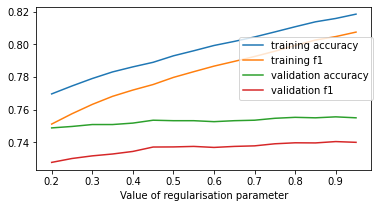

In [ ]:
f1_vals = np.array([np.mean(d['test_f1']) for d in scores])
acc_vals = np.array([np.mean(d['test_acc']) for d in scores])
f1_trains = np.array([np.mean(d['train_f1']) for d in scores])
acc_trains = np.array([np.mean(d['train_acc']) for d in scores])
plt.plot(reg_params,list(zip(acc_trains,f1_trains,acc_vals,f1_vals)))
plt.legend(['training accuracy','training f1','validation accuracy','validation f1'],loc='best', bbox_to_anchor=(0.52, .4, 0.5, 0.5))
plt.xlabel('Value of regularisation parameter')

In [ ]:
gamma_params = np.arange(.00006,.00061,0.00005)
scores=[]
for i, g in enumerate(gamma_params):
  svc = SVC(C=1,gamma=g,kernel='rbf')
  scores.append(cross_validate(svc,chosen_all,all_labels[:,0],cv=5,fit_params={'sample_weight':all_labels[:,1]},scoring={'acc':'accuracy','f1':'f1'},return_train_score=True))

Text(0.5, 0, 'Value of gamma')

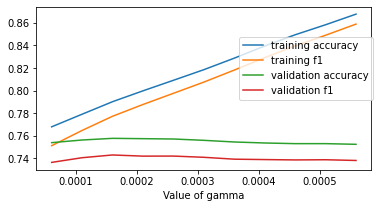

In [ ]:
f1_vals = np.array([np.mean(d['test_f1']) for d in scores])
acc_vals = np.array([np.mean(d['test_acc']) for d in scores])
f1_trains = np.array([np.mean(d['train_f1']) for d in scores])
acc_trains = np.array([np.mean(d['train_acc']) for d in scores])
plt.plot(gamma_params,list(zip(acc_trains,f1_trains,acc_vals,f1_vals)))
plt.legend(['training accuracy','training f1','validation accuracy','validation f1'],loc='best', bbox_to_anchor=(0.52, .4, 0.5, 0.5))
plt.xlabel('Value of gamma')

In [ ]:
#final evaluation
svc = SVC(C=1,gamma=.0002,kernel='rbf')
scores = cross_validate(svc,chosen_all,all_labels[:,0],cv=5,fit_params={'sample_weight':all_labels[:,1]},scoring={'acc':'accuracy','f1':'f1'},return_train_score=True)
print("testing acc  : ", np.mean(scores['test_acc']))
print("training acc : ", np.mean(scores['train_acc']))
print("testing f1   : ", np.mean(scores['test_f1']))
print("training f1  : ", np.mean(scores['train_f1']))

testing acc  :  0.7585294117647059
training acc :  0.7976470588235294
testing f1   :  0.7433001158175062
training f1  :  0.7855554744698603


In [ ]:
#get predictions for test data
svc = SVC(C=1,gamma=.0002,kernel='rbf')
svc.fit(chosen_all,all_labels[:,0],sample_weight=all_labels[:,1].copy(order='C'))
predictions = svc.predict(test_data)

In [ ]:
df = pd.DataFrame(data=predictions.astype(int),columns=['prediction'])
try:
  df.to_csv('/content/drive/MyDrive/Colab Notebooks/FML assignment/predictions.csv',index=False)
except:
  df.to_csv('predictions.csv',index=False)
